In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#loading the file
sat_df = pd.read_csv('../Downloads/SATdata.csv')

In [5]:
sat_df.head()

,year,geography,ethnicity,regsatmaleN,regsatfemaleN,regsattotalN,takesatmaleN,takesatfemaleN,takesattotalN,verbalscoremaleN,...,verbalscorefemaleN,verbalsdfemaleN,verbalscoretotalN,verbalsdtotalN,mathscoremaleN,mathsdmaleN,mathscorefemaleN,mathsdfemaleN,mathscoretotalN,mathsdtotalN
0,1998,Alabama,Mexican,NaN,NaN,NaN,7.0,8.0,15.0,537.0,...,463.0,NaN,497.0,NaN,560.0,NaN,459.0,NaN,506.0,NaN
1,1998,Alabama,Asian,NaN,NaN,NaN,96.0,103.0,199.0,569.0,...,538.0,130.0,553.0,127.0,624.0,105.0,586.0,106.0,605.0,107.0
2,1998,Alabama,Other,NaN,NaN,NaN,26.0,22.0,48.0,594.0,...,558.0,NaN,578.0,110.0,591.0,104.0,530.0,NaN,563.0,115.0
3,1998,Alabama,Black,NaN,NaN,NaN,228.0,335.0,563.0,476.0,...,481.0,110.0,479.0,108.0,482.0,107.0,463.0,96.0,471.0,101.0
4,1998,Alabama,AI,NaN,NaN,NaN,24.0,28.0,52.0,572.0,...,541.0,76.0,555.0,83.0,565.0,NaN,509.0,106.0,535.0,108.0


In [6]:
# Replace spaces with underscores in the 'geography' column to avoid issues in column names later
sat_df['geography'] = sat_df['geography'].str.replace(' ', '_')

In [7]:
sat_df['geography'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District_of_Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'National', 'Nebraska', 'Nevada',
       'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto_Rico', 'Rhode_Island', 'South_Carolina',
       'South_Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin_Islands', 'Virginia', 'Washington', 'West_Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [18]:
sat_df_cleaned = sat_df.query("geography not in ['Puerto_Rico', 'Virgin_Islands', 'National']")

In [19]:
# Making sure the retricted territories are dropped
unique_geographies = sat_df_cleaned['geography'].unique()
unique_geographies

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District_of_Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New_Hampshire',
       'New_Jersey', 'New_Mexico', 'New_York', 'North_Carolina',
       'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode_Island', 'South_Carolina', 'South_Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [20]:
# Filtering the data for URM students (Black, Hispanic, and Mexican)
urm_ethnicities = ['Black', 'Hispanic', 'Mexican']
urm_df = sat_df_cleaned[sat_df_cleaned['ethnicity'].isin(urm_ethnicities)]

# Creating the Treat_s indicator
treated_states = ['Texas', 'Mississippi', 'Louisiana']
urm_df['Treat_s'] = urm_df['geography'].isin(treated_states).astype(int)

# Creating the Post_t indicator (1 for years 2004 and onwards)
urm_df['Post_t'] = (urm_df['year'] >= 2004).astype(int)

# Creating the interaction term
urm_df['Treat_Post'] = urm_df['Treat_s'] * urm_df['Post_t']


C:\Users\zhaoy\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\zhaoy\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\zhaoy\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [21]:
# Displaying a few rows of the modified DataFrame
urm_df[['year', 'geography', 'ethnicity', 'mathscoretotalN', 'takesattotalN', 'Treat_s', 'Post_t', 'Treat_Post']].tail()

,year,geography,ethnicity,mathscoretotalN,takesattotalN,Treat_s,Post_t,Treat_Post
6823,2009,Wyoming,Mexican,513.0,6.0,0,1,0
6828,2009,Wyoming,Hispanic,470.0,5.0,0,1,0
6832,2010,Wyoming,Hispanic,NaN,3.0,0,1,0
6833,2010,Wyoming,Mexican,NaN,3.0,0,1,0
6838,2010,Wyoming,Black,NaN,2.0,0,1,0


In [22]:
# Estimating the DiD model using WLS
weights = urm_df['takesattotalN']
model_formula = 'mathscoretotalN ~ Treat_s + Post_t + Treat_Post'
did_model = smf.wls(model_formula, data=urm_df, weights=weights).fit()

# Displaying the summary of the model
did_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        mathscoretotalN   R-squared:                       0.032
Model:                            WLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     21.03
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           2.10e-13
Time:                        09:57:33   Log-Likelihood:                -10773.
No. Observations:                1904   AIC:                         2.155e+04
Df Residuals:                    1900   BIC:                         2.158e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    437.8673      0.991    441.762      0.000     435.923     439.811
Treat_s        4.5623      2.385      1.913      0.056      -0.115       9.240
Post_t         3.5929      1.235      2.910      0.004       1.171       6.014
Treat_Post     6.8945      2.976      2.317      0.021       1.058      12.731
==============================================================================
Omnibus:                      385.089   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.382
Skew:                          -0.761   Prob(JB):                         0.00
Kurtosis:                       8.643   Cond. No.                         8.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### #2

In [103]:
# Create dummy variables for state fixed effects
#state_dummies = pd.get_dummies(urm_df['geography'], drop_first=True)
#year_dummies = pd.get_dummies(urm_df['year'], prefix='sat_year', drop_first=True)
#urm_data_with_dummies = pd.concat([urm_df, state_dummies], axis=1)

# Regression formula with state fixed effects
#state_dummy_vars = ' + '.join(state_dummies.columns)
#year_dummy_vars = ' + '.join(year_dummies.columns)
formula_state_fe = f'mathscoretotalN ~ Treat_s + Post_t + Treat_Post + C(geography)'

# Run the regression model with state fixed effects
model_state_fe = smf.wls(formula_state_fe, data=urm_df, weights=weights).fit()

# Output the results
model_state_fe.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        mathscoretotalN   R-squared:                       0.436
Model:                            WLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     27.46
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.83e-190
Time:                        11:58:21   Log-Likelihood:                -10260.
No. Observations:                1904   AIC:                         2.063e+04
Df Residuals:                    1851   BIC:                         2.092e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              461.1379      8.656     53.272      0.000     444.161     478.115
C(geography)[T.Alaska]                  -6.6976     16.677     -0.402      0.688     -39.405      26.010
C(geography)[T.Arizona]                 12.9318      9.443      1.369      0.171      -5.589      31.452
C(geography)[T.Arkansas]                12.9280     18.905      0.684      0.494     -24.150      50.006
C(geography)[T.California]             -17.1401      8.694     -1.972      0.049     -34.191      -0.089
C(geography)[T.Colorado]                31.8941     11.069      2.881      0.004      10.184      53.604
C(geography)[T.Connecticut]            -37.6086      9.375     -4.012      0.000     -55.995     -19.222
C(geography)[T.Delaware]               -42.7944     10.688     -4.004      0.000     -63.756     -21.833
C(geography)[T.District_of_Columbia]   -63.4618      9.879     -6.424      0.000     -82.837     -44.087
C(geography)[T.Florida]                 -8.9985      8.750     -1.028      0.304     -26.160       8.163
C(geography)[T.Georgia]                -35.3875      8.807     -4.018      0.000     -52.660     -18.115
C(geography)[T.Hawaii]                   6.2887     15.775      0.399      0.690     -24.650      37.227
C(geography)[T.Idaho]                   37.4858     20.828      1.800      0.072      -3.362      78.334
C(geography)[T.Illinois]                47.7124     10.357      4.607      0.000      27.400      68.024
C(geography)[T.Indiana]                -30.2056      9.339     -3.234      0.001     -48.521     -11.890
C(geography)[T.Iowa]                    69.3416     29.768      2.329      0.020      10.959     127.724
C(geography)[T.Kansas]                  49.1691     18.927      2.598      0.009      12.049      86.290
C(geography)[T.Kentucky]                15.9450     15.703      1.015      0.310     -14.852      46.742
C(geography)[T.Louisiana]               21.9643      7.842      2.801      0.005       6.584      37.344
C(geography)[T.Maine]                  -23.6067     16.966     -1.391      0.164     -56.881       9.668
C(geography)[T.Maryland]               -36.8484      8.863     -4.158      0.000     -54.230     -19.466
C(geography)[T.Massachusetts]          -26.4148      9.167     -2.882      0.004     -44.393      -8.437
C(geography)[T.Michigan]                11.7842     10.486      1.124      0.261      -8.782      32.351
C(geography)[T.Minnesota]               55.6284     16.022      3.472      0.001      24.205      87.051
C(geography)[T.Mississippi]             -8.3939     11.162     -0.752      0.452     -30.285      13.497
C(geography)[T.Missouri]                24.6045     13.829      1.779      0.075      -2.517      51.726
C(geography)[T.Montana]               

In [56]:
urm_df["Post_t"].mean()

0.5384615384615384

In [64]:
# Calculate state-specific means for relevant variables
state_means = urm_df.groupby('geography').mean()[['mathscoretotalN', 'Treat_s', 'Post_t','Treat_Post']]
#state_means = urm_df.groupby('geography').mean()[['mathscoretotalN','Treat_Post']]

In [65]:
print(state_means)

                      mathscoretotalN  Treat_s    Post_t  Treat_Post
geography                                                           
Alabama                    510.820513      0.0  0.538462    0.000000
Alaska                     468.307692      0.0  0.538462    0.000000
Arizona                    473.410256      0.0  0.538462    0.000000
Arkansas                   501.076923      0.0  0.538462    0.000000
California                 443.743590      0.0  0.538462    0.000000
Colorado                   498.230769      0.0  0.538462    0.000000
Connecticut                451.051282      0.0  0.538462    0.000000
Delaware                   450.128205      0.0  0.538462    0.000000
District_of_Columbia       441.205128      0.0  0.538462    0.000000
Florida                    460.384615      0.0  0.538462    0.000000
Georgia                    458.153846      0.0  0.538462    0.000000
Hawaii                     477.743590      0.0  0.538462    0.000000
Idaho                      500.769

In [66]:
# Demean the data within states
state_demeaned = urm_df.join(state_means, on='geography', rsuffix='_mean')
state_demeaned['mathscoretotalN_demeaned'] = state_demeaned['mathscoretotalN'] - state_demeaned['mathscoretotalN_mean']
state_demeaned['Treat_s_demeaned'] = state_demeaned['Treat_s'] - state_demeaned['Treat_s_mean']
state_demeaned['Post_t_demeaned'] = state_demeaned['Post_t'] - state_demeaned['Post_t_mean']
state_demeaned['Treat_Post_demeaned'] = state_demeaned['Treat_Post'] - state_demeaned['Treat_Post_mean']

In [67]:
# Demean the data within states
#state_demeaned = urm_df.join(state_means, on='geography', rsuffix='_mean')
#state_demeaned['mathscoretotalN_demeaned'] = state_demeaned['mathscoretotalN'] - state_demeaned['mathscoretotalN_mean']
#state_demeaned['Treat_s_demeaned'] = state_demeaned['Treat_s'] - state_demeaned['Treat_s_mean']
#state_demeaned['Post_t_demeaned'] = state_demeaned['Post_t'] - state_demeaned['Post_t_mean']
#state_demeaned['Treat_Post_demeaned'] = state_demeaned['Treat_Post'] - state_demeaned['Treat_Post_mean']

# Run regression on the demeaned data
demeaned_formula = 'mathscoretotalN_demeaned ~ Treat_s_demeaned + Post_t_demeaned + Treat_Post_demeaned -1'
model_demeaned = smf.wls(demeaned_formula, data=state_demeaned, weights=weights).fit()

# Display the summary of results
model_demeaned.summary()

C:\Users\zhaoy\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    WLS Regression Results                                   
=============================================================================================
Dep. Variable:     mathscoretotalN_demeaned   R-squared (uncentered):                   0.008
Model:                                  WLS   Adj. R-squared (uncentered):              0.007
Method:                       Least Squares   F-statistic:                              8.073
Date:                      Fri, 17 Nov 2023   Prob (F-statistic):                    0.000323
Time:                              10:18:52   Log-Likelihood:                         -11057.
No. Observations:                      1904   AIC:                                  2.212e+04
Df Residuals:                          1902   BIC:                                  2.213e+04
Df Model:                                 2                                                  
Covariance Type:                  nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Treat_s_demeaned             0          0        nan        nan           0           0
Post_t_demeaned        -2.1282      1.398     -1.522      0.128      -4.871       0.614
Treat_Post_demeaned    13.5444      3.373      4.015      0.000       6.929      20.160
==============================================================================
Omnibus:                      808.264   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3686.030
Skew:                          -2.025   Prob(JB):                         0.00
Kurtosis:                       8.483   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 3

In [131]:
# Creating a new copy of the original DataFrame
sat_data = sat_df_cleaned.copy()

# Creating indicator variables for the treatment states and states with AA bans
treatment_states = ['Texas', 'Louisiana', 'Mississippi']
control_states = ['Washington', 'Florida', 'Michigan', 'Nebraska']

# Indicators for treatment states and AA ban states
sat_data['Treated_State'] = sat_data['geography'].isin(treatment_states).astype(int)
sat_data['Control_State'] = sat_data['geography'].isin(control_states).astype(int)

# Indicators for year
sat_data['Post_Treatment'] = (sat_data['year'] >= 2004).astype(int)

# Interaction term between Treated State and Post Treatment
sat_data['DD_coefficient'] = sat_data['Treated_State'] * sat_data['Post_Treatment']

In [132]:
sat_data.columns

Index(['year', 'geography', 'ethnicity', 'regsatmaleN', 'regsatfemaleN',
       'regsattotalN', 'takesatmaleN', 'takesatfemaleN', 'takesattotalN',
       'verbalscoremaleN', 'verbalsdmaleN', 'verbalscorefemaleN',
       'verbalsdfemaleN', 'verbalscoretotalN', 'verbalsdtotalN',
       'mathscoremaleN', 'mathsdmaleN', 'mathscorefemaleN', 'mathsdfemaleN',
       'mathscoretotalN', 'mathsdtotalN', 'Treated_State', 'Control_State',
       'Post_Treatment', 'DD_coefficient'],
      dtype='object')

In [106]:
sat_data['ethnicity'].unique()

array(['Mexican', 'Asian', 'Other', 'Black', 'AI', 'White', 'Hispanic',
       'ALL', 'PR', 'NR'], dtype=object)

In [139]:
# Filtering data for URMs and Whites
urm_sat_data = sat_data[sat_data['ethnicity'].isin(['Black', 'Hispanic', 'Mexican'])]
white_sat_data = sat_data[sat_data['ethnicity'] == 'White']
asian_sat_data = sat_data[sat_data['ethnicity'] == 'Asian']

In [140]:
# Define the regression formula
formula_3 = 'mathscoretotalN ~ DD_coefficient + Control_State + C(geography) + C(year)'

# Running the DiD regressions for URMs for math scores
model_urm_math = smf.wls(formula_3, data=urm_sat_data, weights=urm_sat_data['takesattotalN']).fit()

# Displaying the summary of the results for URMs
model_urm_math.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        mathscoretotalN   R-squared:                       0.439
Model:                            WLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     22.85
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          4.79e-185
Time:                        13:05:53   Log-Likelihood:                -10254.
No. Observations:                1904   AIC:                         2.064e+04
Df Residuals:                    1840   BIC:                         2.099e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              461.9732      8.807     52.457      0.000     444.701     479.246
C(geography)[T.Alaska]                  -6.7333     16.676     -0.404      0.686     -39.440      25.973
C(geography)[T.Arizona]                 12.8078      9.443      1.356      0.175      -5.713      31.328
C(geography)[T.Arkansas]                12.7916     18.905      0.677      0.499     -24.285      49.868
C(geography)[T.California]             -17.2577      8.694     -1.985      0.047     -34.308      -0.207
C(geography)[T.Colorado]                31.8180     11.069      2.874      0.004      10.108      53.528
C(geography)[T.Connecticut]            -37.7210      9.375     -4.024      0.000     -56.107     -19.335
C(geography)[T.Delaware]               -42.9050     10.688     -4.014      0.000     -63.866     -21.944
C(geography)[T.District_of_Columbia]   -63.5320      9.879     -6.431      0.000     -82.907     -44.157
C(geography)[T.Florida]                -15.0004      4.939     -3.037      0.002     -24.687      -5.314
C(geography)[T.Georgia]                -35.4920      8.807     -4.030      0.000     -52.764     -18.220
C(geography)[T.Hawaii]                   6.1944     15.775      0.393      0.695     -24.744      37.133
C(geography)[T.Idaho]                   37.3658     20.827      1.794      0.073      -3.482      78.213
C(geography)[T.Illinois]                47.6757     10.356      4.603      0.000      27.364      67.987
C(geography)[T.Indiana]                -30.3085      9.339     -3.245      0.001     -48.624     -11.993
C(geography)[T.Iowa]                    69.3346     29.767      2.329      0.020      10.954     127.716
C(geography)[T.Kansas]                  49.1122     18.927      2.595      0.010      11.992      86.232
C(geography)[T.Kentucky]                15.8860     15.702      1.012      0.312     -14.910      46.682
C(geography)[T.Louisiana]               18.9970     12.418      1.530      0.126      -5.359      43.353
C(geography)[T.Maine]                  -23.7380     16.966     -1.399      0.162     -57.013       9.537
C(geography)[T.Maryland]               -36.9479      8.863     -4.169      0.000     -54.330     -19.566
C(geography)[T.Massachusetts]          -26.5445      9.167     -2.896      0.004     -44.523      -8.566
C(geography)[T.Michigan]                 5.8992      6.667      0.885      0.376      -7.176      18.975
C(geography)[T.Minnesota]               55.5204     16.022      3.465      0.001      24.098      86.943
C(geography)[T.Mississippi]            -11.3922     16.745     -0.680      0.496     -44.234      21.450
C(geography)[T.Missouri]                24.5735     13.828      1.777      0.076      -2.547      51.694
C(geography)[T.Montana]               

In [141]:
# Define the regression formulas
formula_4 = 'verbalscoretotalN ~ DD_coefficient + Control_State + C(geography) + C(year)'

# Running the DiD regressions for URMs for verbal scores
model_urm_verbal = smf.wls(formula_4, data=urm_sat_data, weights=urm_sat_data['takesattotalN']).fit()

# Running the rest of models needed
model_white_math = smf.wls(formula_3, data=white_sat_data, weights=white_sat_data['takesattotalN']).fit()
model_white_verbal = smf.wls(formula_4, data=white_sat_data, weights=white_sat_data['takesattotalN']).fit()
model_asian_math = smf.wls(formula_3, data=asian_sat_data, weights=white_sat_data['takesattotalN']).fit()
model_asian_verbal = smf.wls(formula_4, data=asian_sat_data, weights=white_sat_data['takesattotalN']).fit()

In [155]:
# Define the regression formulas for number of test takers (column 3)
formula_5 = 'takesattotalN ~ DD_coefficient + Control_State + C(geography) + C(year)'

# Running the DiD regressions for all groups
model_urm_takers = smf.wls(formula_5, data=urm_sat_data, weights=urm_sat_data['takesattotalN']).fit()
model_white_takers = smf.wls(formula_5, data=white_sat_data, weights=white_sat_data['takesattotalN']).fit()
model_asian_takers = smf.wls(formula_5, data=asian_sat_data, weights=asian_sat_data['takesattotalN']).fit()

In [168]:
# Function to extract specified parameters from a list of models
def extract_specific_parameters(models, coefficient_name):
    results = []

    for model_name, model in models.items():
        results.append({
            "Model": model_name,
            "DD Coefficient": model.params[coefficient_name],
            "DD Coefficient Std Error": model.bse[coefficient_name],
            "Observations": model.nobs,
            "R-squared": model.rsquared
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# List of models
models = {
    "URM Math": model_urm_math,
    "URM Verbal": model_urm_verbal,
    "URM Takers": model_urm_takers,
    "White Math": model_white_math,
    "White Verbal": model_white_verbal,
    "White Takers": model_white_takers,
    "Asian Math": model_asian_math,
    "Asian Verbal": model_asian_verbal,
    "Asian Takers": model_asian_takers,
}

# Name of the coefficient
coefficient_name = "DD_coefficient"

# Extracting parameters and creating a DataFrame
results_table = extract_specific_parameters(models, coefficient_name)
print(results_table)


   DD Coefficient  DD Coefficient Std Error         Model  Observations  \
0        7.077771                  2.304877      URM Math        1904.0   
1       -1.148825                  1.915164    URM Verbal        1901.0   
2      257.801798                658.323516    URM Takers        1985.0   
3        4.145138                  1.048290    White Math         663.0   
4        0.024650                  0.994140  White Verbal         663.0   
5     1326.044035                810.658686  White Takers         663.0   
6       -3.670717                  1.867633    Asian Math         663.0   
7        0.447863                  1.821398  Asian Verbal         663.0   
8    -2082.769712                814.798263  Asian Takers         663.0   

   R-squared  
0   0.438899  
1   0.529600  
2   0.657925  
3   0.968403  
4   0.970592  
5   0.987938  
6   0.931188  
7   0.924914  
8   0.975414  


In [165]:
results_table.set_index('Model', inplace=True)
results_table

,DD Coefficient,DD Coefficient Std Error,Observations,R-squared
Model,,,,
URM Math,7.077771,2.304877,1904.0,0.438899
URM Verbal,-1.148825,1.915164,1901.0,0.529600
URM Takers,257.801798,658.323516,1985.0,0.657925
White Math,4.145138,1.048290,663.0,0.968403
White Verbal,0.024650,0.994140,663.0,0.970592
White Takers,1326.044035,810.658686,663.0,0.987938
Asian Math,-3.670717,1.867633,663.0,0.931188
Asian Verbal,0.447863,1.821398,663.0,0.924914
Asian Takers,-2082.769712,814.798263,663.0,0.975414


In [186]:
model_urm_math.params

Intercept                               461.973241
C(geography)[T.Alaska]                   -6.733286
C(geography)[T.Arizona]                  12.807817
C(geography)[T.Arkansas]                 12.791550
C(geography)[T.California]              -17.257731
C(geography)[T.Colorado]                 31.818002
C(geography)[T.Connecticut]             -37.721008
C(geography)[T.Delaware]                -42.904969
C(geography)[T.District_of_Columbia]    -63.531977
C(geography)[T.Florida]                 -15.000409
C(geography)[T.Georgia]                 -35.491961
C(geography)[T.Hawaii]                    6.194438
C(geography)[T.Idaho]                    37.365759
C(geography)[T.Illinois]                 47.675661
C(geography)[T.Indiana]                 -30.308543
C(geography)[T.Iowa]                     69.334626
C(geography)[T.Kansas]                   49.112160
C(geography)[T.Kentucky]                 15.885964
C(geography)[T.Louisiana]                18.997026
C(geography)[T.Maine]          

In [176]:
# Replicating column 3
# Creating race dummies and additional interaction terms
sat_data['race'] = sat_data['ethnicity'].apply(lambda x: 1 if x in urm_ethnicities else 0)


In [177]:
sat_data.columns

Index(['year', 'geography', 'ethnicity', 'regsatmaleN', 'regsatfemaleN',
       'regsattotalN', 'takesatmaleN', 'takesatfemaleN', 'takesattotalN',
       'verbalscoremaleN', 'verbalsdmaleN', 'verbalscorefemaleN',
       'verbalsdfemaleN', 'verbalscoretotalN', 'verbalsdtotalN',
       'mathscoremaleN', 'mathsdmaleN', 'mathscorefemaleN', 'mathsdfemaleN',
       'mathscoretotalN', 'mathsdtotalN', 'Treated_State', 'Control_State',
       'Post_Treatment', 'DD_coefficient', 'is_urm', 'treatment_race',
       'time_race', 'DDD_coefficient', 'race'],
      dtype='object')

In [178]:
# Creating additional interaction terms for race
sat_data['treatment_race'] = sat_data['Treated_State'] * sat_data['race']
sat_data['time_race'] = sat_data['Post_Treatment'] * sat_data['race']
sat_data['DDD_coefficient'] = sat_data['Treated_State'] * sat_data['Post_Treatment'] * sat_data['race']

# Define the regression model formulas
formula_ddd_math = 'mathscoretotalN ~ DD_coefficient + treatment_race + time_race + DDD_coefficient + Control_State + C(geography) + C(year)'
formula_ddd_verbal = 'verbalscoretotalN ~ DD_coefficient + treatment_race + time_race + DDD_coefficient + Control_State + C(geography) + C(year)'
formula_ddd_takers = 'takesattotalN ~ DD_coefficient + treatment_race + time_race + DDD_coefficient + Control_State + C(geography) + C(year)'

# Run the regression
ddd_model_math = smf.wls(formula_ddd_math, data=sat_data, weights=sat_data['takesattotalN']).fit()
ddd_model_verbal = smf.wls(formula_ddd_verbal, data=sat_data, weights=sat_data['takesattotalN']).fit()
ddd_model_takers = smf.wls(formula_ddd_takers, data=sat_data, weights=sat_data['takesattotalN']).fit()

In [179]:
# Function to extract specified parameters from a list of models
def extract_ddd_parameters(ddd_models, coefficient_name2):
    results2 = []

    for model_name2, model2 in ddd_models.items():
        results2.append({
            "Model": model_name2,
            "DDD Coefficient": model2.params[coefficient_name2],
            "DDD Coefficient Std Error": model2.bse[coefficient_name2],
            "Observations": model2.nobs,
            "R-squared": model2.rsquared
        })

    # Convert results to DataFrame
    results_df2 = pd.DataFrame(results2)
    return results_df2

# List of models
ddd_models = {
    "Triple-Difference Math": ddd_model_math,
    "Triple-Difference Verbal": ddd_model_verbal,
    "Triple-Difference Takers": ddd_model_takers,
}

# Name of the coefficient
coefficient_name2 = "DDD_coefficient"

# Extracting parameters and creating a DataFrame
results_table2 = extract_ddd_parameters(ddd_models, coefficient_name2)
print(results_table2)


   DDD Coefficient  DDD Coefficient Std Error                     Model  \
0        82.911162                   4.803038    Triple-Difference Math   
1        68.962792                   4.112810  Triple-Difference Verbal   
2     45720.939632                8126.093314  Triple-Difference Takers   

   Observations  R-squared  
0        6396.0   0.627407  
1        6385.0   0.677536  
2        6606.0   0.538535  


In [180]:
results_table2.set_index('Model', inplace=True)
results_table2

,DDD Coefficient,DDD Coefficient Std Error,Observations,R-squared
Model,,,,
Triple-Difference Math,82.911162,4.803038,6396.0,0.627407
Triple-Difference Verbal,68.962792,4.112810,6385.0,0.677536
Triple-Difference Takers,45720.939632,8126.093314,6606.0,0.538535


### 4

In [188]:
# Creating a new copy of the original DataFrame
sat_data_new = sat_df_cleaned.copy()

# Creating indicator variables for the treatment states and states with AA bans
treatment_states = ['Texas', 'Louisiana', 'Mississippi']
control_states = ['Washington', 'Florida', 'Michigan', 'Nebraska']

# Indicators for treatment states and AA ban states
sat_data_new['Treated_State'] = sat_data_new['geography'].isin(treatment_states).astype(int)
sat_data_new['Control_State'] = sat_data_new['geography'].isin(control_states).astype(int)

# Indicators for year
sat_data_new['Post_Treatment'] = (sat_data_new['year'] >= 2004).astype(int)

# Interaction term between Treated State and Post Treatment
sat_data_new['DD_coefficient'] = sat_data_new['Treated_State'] * sat_data_new['Post_Treatment']

In [197]:
state_dummies_new = pd.get_dummies(sat_data_new['geography'], drop_first=True)
year_dummies_new = pd.get_dummies(sat_data_new['year'], prefix='yr', drop_first=True)
data_with_dummies_new = pd.concat([sat_data_new, state_dummies_new, year_dummies_new], axis=1)

In [198]:
# Filtering data for URMs and Whites
urm_sat_data_new = data_with_dummies_new[data_with_dummies_new['ethnicity'].isin(['Black', 'Hispanic', 'Mexican'])]
white_sat_data_new = data_with_dummies_new[data_with_dummies_new['ethnicity'] == 'White']

In [199]:
urm_sat_data_new.columns

Index(['year', 'geography', 'ethnicity', 'regsatmaleN', 'regsatfemaleN',
       'regsattotalN', 'takesatmaleN', 'takesatfemaleN', 'takesattotalN',
       'verbalscoremaleN', 'verbalsdmaleN', 'verbalscorefemaleN',
       'verbalsdfemaleN', 'verbalscoretotalN', 'verbalsdtotalN',
       'mathscoremaleN', 'mathsdmaleN', 'mathscorefemaleN', 'mathsdfemaleN',
       'mathscoretotalN', 'mathsdtotalN', 'Treated_State', 'Control_State',
       'Post_Treatment', 'DD_coefficient', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District_of_Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylv

In [226]:
# Creating dummies
state_dummy_vars_new = ' + '.join(state_dummies_new.columns)
year_dummy_vars_new = ' + '.join(year_dummies_new.columns)

In [229]:
# Function to run regression and extract coefficients and confidence intervals
def get_year_coefficients(urm_sat_data_new):
    # Running the regression
    model_a = smf.wls(f'mathscoretotalN ~ DD_coefficient + Control_State + {state_dummy_vars_new} + {year_dummy_vars_new}', data=urm_sat_data_new, weights=urm_sat_data_new['takesattotalN']).fit()
    
    # Extracting coefficients and confidence intervals
    coefs = model_a.params
    conf_int = model_a.conf_int()
    return coefs, conf_int

# Getting coefficients and confidence intervals for URM
coefs_urms, conf_int_urms = get_year_coefficients(urm_sat_data_new)


In [230]:
# Function to run regression and extract coefficients and confidence intervals
def get_year_coefficients_2(white_sat_data_new):
    # Running the regression
    model_b = smf.wls(f'mathscoretotalN ~ DD_coefficient + Control_State + {state_dummy_vars_new} + {year_dummy_vars_new}', data=white_sat_data_new, weights=white_sat_data_new['takesattotalN']).fit()
    
    # Extracting coefficients and confidence intervals
    coefs_b = model_b.params
    conf_int_b = model_b.conf_int()
    return coefs_b, conf_int_b

# Getting coefficients and confidence intervals for URM
coefs_white, conf_int_white = get_year_coefficients_2(white_sat_data_new)

In [237]:
# Creating Dataframe for graphing
years = range(1999, 2011)  # Years from 1999 to 2010
year_keys = [f'yr_{year}' for year in years]  # Keys in the series for these years

# Filter the series to include only the entries for years 1999 to 2010
year_coefs_URM = coefs_urms[year_keys]

# Create a new DataFrame
urm_graph = pd.DataFrame({
    'Year': years,
    'Coefs': year_coefs_URM.values
})

# Same for white students
year_coefs_White = coefs_white[year_keys]
white_graph = pd.DataFrame({
    'Year': years,
    'Coefs': year_coefs_White.values
})


In [242]:
# Adding confidence intervals into the DataFrame
year_conf_int_URM = conf_int_urms.loc[year_keys, 1]
urm_graph['Conf_int'] = year_conf_int_URM.values

year_conf_int_white = conf_int_white.loc[year_keys, 1]
white_graph['Conf_int'] = year_conf_int_white.values

print(urm_graph)
print(white_graph)

    Year     Coefs  Conf_int
0   1999 -3.462134  1.395296
1   2000  0.199732  5.037954
2   2001 -0.414894  4.401208
3   2002 -0.294699  4.493967
4   2003 -0.439022  4.314272
5   2004 -0.186991  4.518254
6   2005  4.353927  8.934628
7   2006  3.527250  8.086027
8   2007  3.785338  8.268559
9   2008  2.125564  6.525067
10  2009  2.098769  6.442724
11  2010  4.572802  8.874483
    Year      Coefs   Conf_int
0   1999   0.191201   1.671767
1   2000   2.439088   3.923252
2   2001   3.233817   4.720792
3   2002   5.055252   6.544803
4   2003   6.149422   7.655008
5   2004   3.134317   4.624088
6   2005   8.478195   9.921282
7   2006   9.407213  10.849618
8   2007   7.460192   8.901739
9   2008  10.080198  11.510512
10  2009  10.161818  11.596527
11  2010  10.228619  11.669116


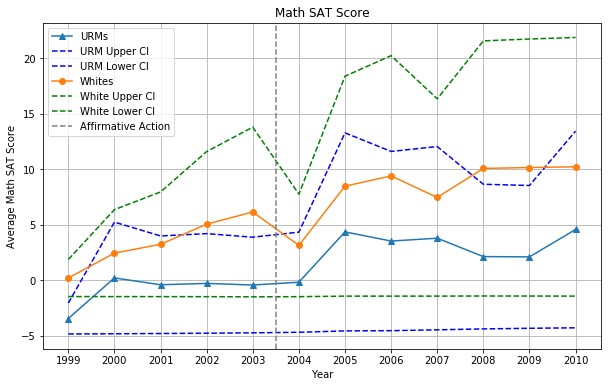

In [255]:
plt.figure(figsize=(10, 6))

# Plotting for URM
plt.plot(urm_graph['Year'], urm_graph['Coefs'], label='URMs', marker='^', linestyle='-')
# Confidence intervals for URM
plt.plot(urm_graph['Year'], urm_graph['Coefs'] + urm_graph['Conf_int'], label='URM Upper CI', linestyle='--', color='blue')
plt.plot(urm_graph['Year'], urm_graph['Coefs'] - urm_graph['Conf_int'], label='URM Lower CI', linestyle='--', color='blue')

# Plotting for Whites
plt.plot(white_graph['Year'], white_graph['Coefs'], label='Whites', marker='o', linestyle='-')
# Confidence intervals for Whites
plt.plot(white_graph['Year'], white_graph['Coefs'] + white_graph['Conf_int'], label='White Upper CI', linestyle='--', color='green')
plt.plot(white_graph['Year'], white_graph['Coefs'] - white_graph['Conf_int'], label='White Lower CI', linestyle='--', color='green')

plt.axvline(x=2003.5, color='gray', linestyle='--', label="Affirmative Action")  # Mid-point between 2003 and 2004
plt.title('Math SAT Score')
plt.xlabel('Year')
plt.ylabel('Average Math SAT Score')
plt.xticks(urm_graph['Year'])
plt.legend()
plt.grid(True)
plt.show()


### 5

In [256]:
# Define the weights for URMs and Whites
weights_urms = {'New Jersey': 0.248, 'Pennsylvania': 0.232, 'Nevada': 0.222, 'Ohio': 0.192, 'West Virginia': 0.042, 'Kentucky': 0.035, 'Minnesota': 0.03}
weights_whites = {'California': 0.321, 'Indiana': 0.225, 'Arizona': 0.158, 'West Virginia': 0.107, 'North Carolina': 0.094, 'Ohio': 0.071, 'Alabama': 0.022, 'Pennsylvania': 0.003}

In [266]:
# Function to calculate weighted average for a given ethnicity and year
def calculate_weighted_average(data, weights, year):
    relevant_data = data[(data['year'] == year) & (data['ethnicity'].isin(['Black', 'Hispanic', 'Mexican']))]
    weighted_sum = sum(relevant_data['mathscoretotalN'] * relevant_data['geography'].map(weights))
    total_weight = sum(weights.get(state, 0) for state in relevant_data['geography'])
    return weighted_sum / total_weight if total_weight > 0 else None

In [267]:
# Example usage for a specific year and ethnicity
weighted_average_urms = calculate_weighted_average(sat_data_new, weights_urms, 2004)
#weighted_average_whites = calculate_weighted_average(sat_data_new, weights_whites, 2004, 'White')


In [268]:
weighted_average_urms

nan